# Week 3 Investigation

Using a suitable image of your own or from our examples (within the zip file) or obtained yourself, and whichever platform you are comfortable with, experiment any of the following sorts of operation: 

- Change brightness and contrast of the image. 
- Change the colour balance of the image.
- Blur the image.  
- Find the edges within the image. 
- Obtain the histogram of the image. 

If you are working with code, you could also go a little further and try some of the segmentation techniques in full (following the examples in the supplied notebook): 

- Threshold one of the channels in the image. 
- Cluster the colours in the image.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io

## Hunga-Tonga Explosion

I decided to start with the Hunga-Tonga explosion images that I used in last week's investigation.

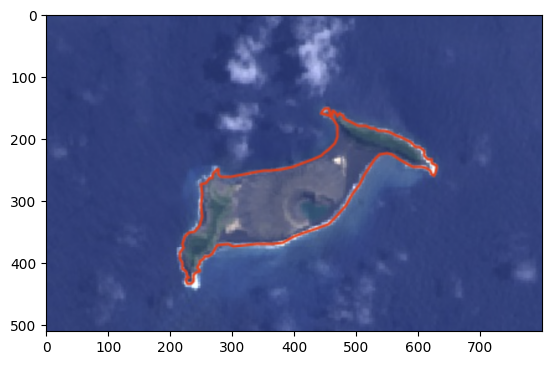

In [5]:
img_ht_before_l8 = io.imread('images/hunga_tonga_before_landsat8.png')

fig0 = plt.figure(0)
ax = fig0.add_subplot(111)
ax.imshow(img_ht_before_l8)

plt.show()

### Changing the brightness and contrast of the image

In this section, I make adjustments to the brightness and the contrast and then display them side-by-side with the original image.

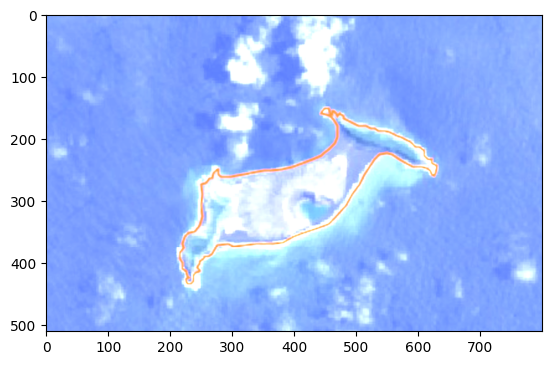

In [8]:
channels = [img_ht_before_l8[:, :, i] for i in range(3)]

brightness = 2.5

bright_channels = [np.clip((brightness * ch), 0, 255) for ch in channels]
bright_channels = [ch.astype(np.uint8) for ch in bright_channels]

bright_img = np.stack(bright_channels, axis=2)

fig1 = plt.figure(1)
ax = fig1.add_subplot(111)
ax.imshow(bright_img)

plt.show()